In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## The Data 

In [143]:
df = pd.read_csv('the_office_series.csv')

In [144]:
df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


## Summary Statistics

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [146]:
df.describe()

,Unnamed: 0,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


In [147]:
df.shape

(188, 12)

## EDA

In [148]:
df.rename(columns={'Unnamed: 0': 'EpisodeNumber'}, inplace = True)

In [149]:
df.head(3)

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein


In [150]:
df['EpisodeNumber']+=1

In [151]:
df.head(3)

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein


Create a scatter plot of the data that contains the following attributes:

1. Each episode's episode number plotted along the x-axis
2. Each episode's viewership (in millions) plotted along the y-axis
3. A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that: 
<br>Ratings < 0.25 are colored "red"
<br>Ratings >= 0.25 and < 0.50 are colored "orange"
<br>Ratings >= 0.50 and < 0.75 are colored "lightgreen"
<br>Ratings >= 0.75 are colored "darkgreen"
4. A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
5. A title, reading "Popularity, Quality, and Guest Appearances on the Office"
6. An x-axis label reading "Episode Number"
7. A y-axis label reading "Viewership (Millions)"

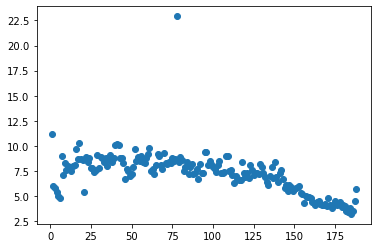

In [152]:
fig = plt.figure()
plt.scatter(x = df['EpisodeNumber'], y= df['Viewership'])
plt.show()

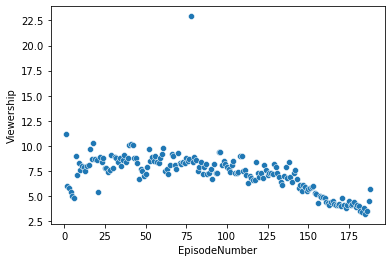

In [153]:
_ = sns.scatterplot(data = df, 
               x = 'EpisodeNumber',
               y = 'Viewership',
                   )
_ = plt.show()

We want to add a colour scheme by using the scaled ratings. Our dataset doesn't have this so we need to scale our ratings column. There are lots of ways of doing this. I'm going to use the MinMax Scaler from Scikit-Learn. 

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
scaler = MinMaxScaler()
df['ScaledRatings'] = scaler.fit_transform(df[['Ratings']])

In [156]:
df.head(3)

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,ScaledRatings
0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125
1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125
2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500


Now, we want to assign colours based on the values of the scaled ratings: 
If the scaled ratings < 0.25 then the datapoints are colored "red", >= 0.25 and < 0.50 are colored "orange",>= 0.50 and < 0.75 are colored "lightgreen" and >= 0.75 are colored "darkgreen". 

In [157]:
cols = []
for ind,row in df.iterrows():
    if row['ScaledRatings'] < 0.25:
        cols.append('red')
    elif row['ScaledRatings'] < 0.50:
        cols.append('orange')
    elif row['ScaledRatings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

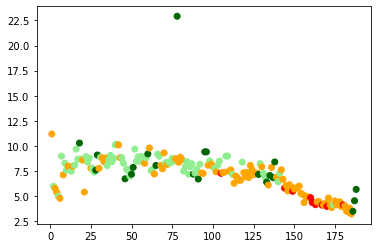

In [158]:
fig = plt.figure()
plt.scatter(x = df['EpisodeNumber'], y= df['Viewership'], c= cols)
plt.show()

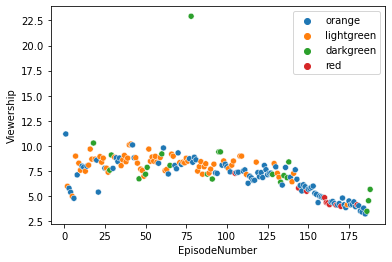

In [159]:
_ = sns.scatterplot(data = df, 
               x = 'EpisodeNumber',
               y = 'Viewership',
                    hue = cols
                   )
_ = plt.show()

A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25

In [160]:
conditions = [(df['GuestStars'].isna()), (df['GuestStars'].notna())]
values = ['False','True']
df['HasGuestStars'] = np.select(conditions, values)

In [161]:
df.head(3)

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,ScaledRatings,HasGuestStars
0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125,False
1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125,False
2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500,False


In [163]:
type(df.iloc[5]['HasGuestStars'])

str

In [164]:
marker_size = []

for ind,row in df.iterrows():
    if row['HasGuestStars'] == 'True':
        marker_size.append(250)
    else:
        marker_size.append(25)

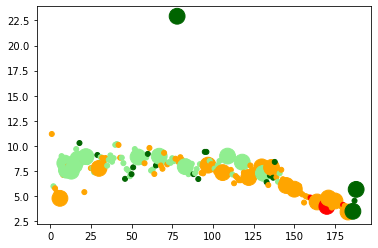

In [166]:
fig = plt.figure()
plt.scatter(x = df['EpisodeNumber'], y= df['Viewership'], c= cols, s= marker_size)
plt.show()

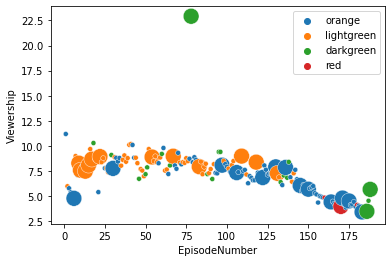

In [195]:
_ = sns.scatterplot(data = df, 
               x = 'EpisodeNumber',
               y = 'Viewership',
                    hue = cols,
                    s = marker_size
                   )
_ = plt.show()

5. A title, reading "Popularity, Quality, and Guest Appearances on the Office"
6. An x-axis label reading "Episode Number"
7. A y-axis label reading "Viewership (Millions)

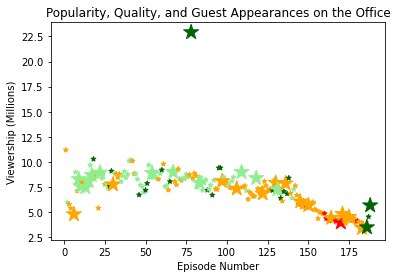

In [198]:
fig = plt.figure()
plt.scatter(x = df['EpisodeNumber'], y= df['Viewership'], c= cols, s= marker_size, marker = '*')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel("Viewership (Millions)")
plt.show()

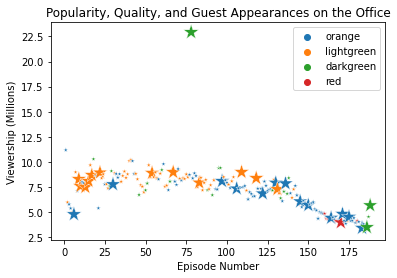

In [197]:
g = sns.scatterplot(data = df, 
               x = 'EpisodeNumber',
               y = 'Viewership',
                    hue = cols,
                    s = marker_size,
                    marker = '*'
                   )
g = g.set(xlabel='Episode Number', ylabel='Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
_ = plt.show()

Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [187]:
df[df['GuestStars'].notna()]['Viewership'].max()

22.91

In [192]:
df[df['Viewership'] == 22.91]['GuestStars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: GuestStars, dtype: object

In [199]:
top_star = 'Cloris Leachman'